## Task.2 vars

In [1]:
## read the modules 
from covid19dh import covid19
import numpy as np
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt 
import seaborn as sns 
import dask.dataframe as dd
from plotnine import *
%matplotlib inline

In [2]:
## read the nuts classification 
nuts = pd.read_excel('01_Raw Data/NUTS2021.xlsx', sheet_name = "NUTS & SR 2021")
lau = pd.read_excel('01_Raw Data/EU-28_LAU_2016.xlsx')
shape = gpd.read_file('../01_GIS/02_Full file/Full shape.shp')
shape

NUTS_ID                                           geometry
0                 BG423  POLYGON ((24.42101 42.55306, 24.41032 42.46950...
1                 BG424  POLYGON ((25.07422 41.79348, 25.05851 41.75177...
2                 BG425  POLYGON ((25.94863 41.32034, 25.90644 41.30757...
3                 CH011  MULTIPOLYGON (((6.86623 46.90929, 6.89621 46.9...
4                 CH012  POLYGON ((8.47767 46.52760, 8.39953 46.48872, ...
...                 ...                                                ...
2313  NO012_NO031_NO032  MULTIPOLYGON (((10.87495 58.95920, 10.87465 58...
2314       UKM71_UKM77x  MULTIPOLYGON (((-3.24527 56.35694, -3.25332 56...
2315  UKM61_UKM62_UKM63  MULTIPOLYGON (((-5.56633 55.28460, -5.56466 55...
2316  UKM81_UKM82_UKM83  POLYGON ((-4.60980 55.94673, -4.60229 55.95791...
2317       UKM76_UKM77x  POLYGON ((-4.33047 56.53760, -4.33486 56.53344...

[2318 rows x 2 columns]

##  1. COVID-19 DATA-HUB

In [2]:
!pip install --upgrade covid19dh

In [4]:
eu_codes = """Code	Country	Alpha-2	Alpha-3
040	Austria	AT	AUT
056	Belgium	BE	BEL
100	Bulgaria	BG	BGR
191	Croatia	HR	HRV
196	Cyprus	CY	CYP
203	Czech Republic	CZ	CZE
208	Denmark	DK	DNK
233	Estonia	EE	EST
246	Finland	FI	FIN
250	France	FR	FRA
276	Germany	DE	DEU
300	Greece	GR	GRC
348	Hungary	HU	HUN
372	Ireland, Republic of (EIRE)	IE	IRL
380	Italy	IT	ITA
428	Latvia	LV	LVA
440	Lithuania	LT	LTU
442	Luxembourg	LU	LUX
470	Malta	MT	MLT
528	Netherlands	NL	NLD
616	Poland	PL	POL
620	Portugal	PT	PRT
642	Romania	RO	ROU
703	Slovakia	SK	SVK
705	Slovenia	SI	SVN
724	Spain	ES	ESP
752	Sweden	SE	SWE
826	United Kingdom	GB	GBR"""

In [5]:
eu_codes = pd.DataFrame([i.split('\t') for i in eu_codes.split('\n')]).iloc[1:,:]
eu_codes.drop(columns = 0, inplace= True)
eu_codes.columns = ['country', 'iso2', 'iso3']
add = pd.DataFrame({'country': ['Norway', 'Switzerland','Iceland'],
                    'iso2' : ['NO', 'CH','IS'],
                    'iso3' : ['NOR', 'CHE' ,'ISE']})
eu_codes = pd.concat([eu_codes, add], axis = 0, ignore_index = True)
eu_codes

country iso2 iso3
0                       Austria   AT  AUT
1                       Belgium   BE  BEL
2                      Bulgaria   BG  BGR
3                       Croatia   HR  HRV
4                        Cyprus   CY  CYP
5                Czech Republic   CZ  CZE
6                       Denmark   DK  DNK
7                       Estonia   EE  EST
8                       Finland   FI  FIN
9                        France   FR  FRA
10                      Germany   DE  DEU
11                       Greece   GR  GRC
12                      Hungary   HU  HUN
13  Ireland, Republic of (EIRE)   IE  IRL
14                        Italy   IT  ITA
15                       Latvia   LV  LVA
16                    Lithuania   LT  LTU
17                   Luxembourg   LU  LUX
18                        Malta   MT  MLT
19                  Netherlands   NL  NLD
20                       Poland   PL  POL
21                     Portugal   PT  PRT
22                      Romania   RO  ROU
23                     Slovakia   SK  SVK
24                     Slovenia   SI  SVN
25                        Spain   ES  ESP
26                       Sweden   SE  SWE
27               United Kingdom   GB  GBR
28                       Norway   NO  NOR
29                  Switzerland   CH  CHE
30                      Iceland   IS  ISE

In [43]:
x, src = covid19(eu_codes[3], level = 1, verbose = False)

In [44]:
print('Available countries are:')
print(len(eu_codes[eu_codes[3].isin(src.iso_alpha_3.unique())]))
print()
eu_codes[eu_codes[3].isin(src.iso_alpha_3.unique())]

Available countries are:
28



0                            1   2    3
1   040                      Austria  AT  AUT
2   056                      Belgium  BE  BEL
3   100                     Bulgaria  BG  BGR
4   191                      Croatia  HR  HRV
5   196                       Cyprus  CY  CYP
6   203               Czech Republic  CZ  CZE
7   208                      Denmark  DK  DNK
8   233                      Estonia  EE  EST
9   246                      Finland  FI  FIN
10  250                       France  FR  FRA
11  276                      Germany  DE  DEU
12  300                       Greece  GR  GRC
13  348                      Hungary  HU  HUN
14  372  Ireland, Republic of (EIRE)  IE  IRL
15  380                        Italy  IT  ITA
16  428                       Latvia  LV  LVA
17  440                    Lithuania  LT  LTU
18  442                   Luxembourg  LU  LUX
19  470                        Malta  MT  MLT
20  528                  Netherlands  NL  NLD
21  616                       Poland  PL  POL
22  620                     Portugal  PT  PRT
23  642                      Romania  RO  ROU
24  703                     Slovakia  SK  SVK
25  705                     Slovenia  SI  SVN
26  724                        Spain  ES  ESP
27  752                       Sweden  SE  SWE
28  826               United Kingdom  GB  GBR

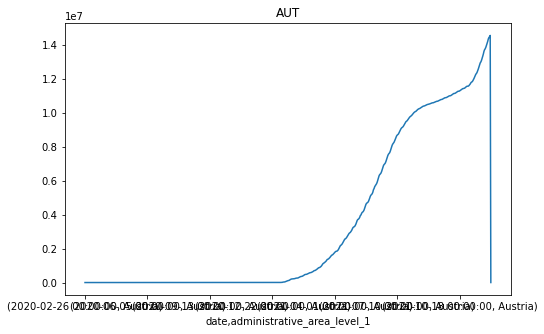

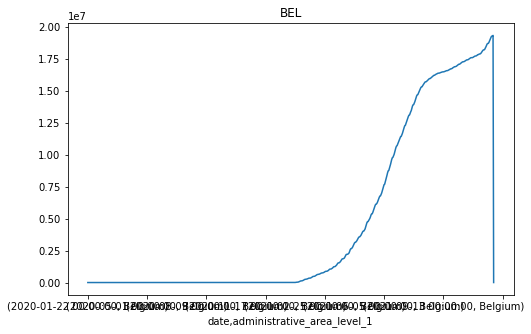

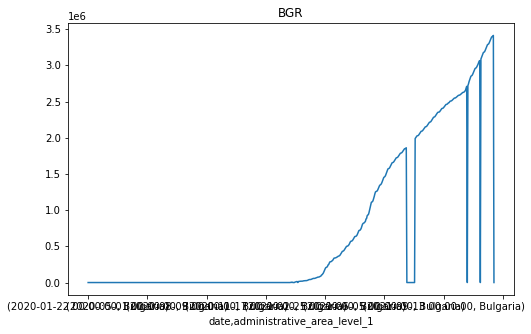

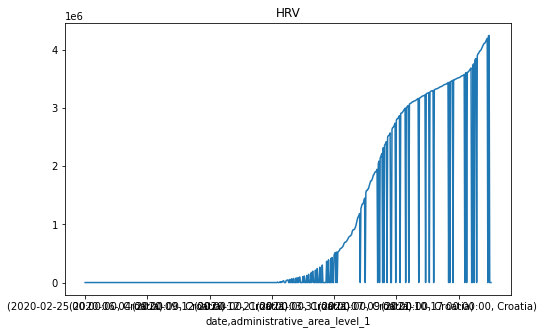

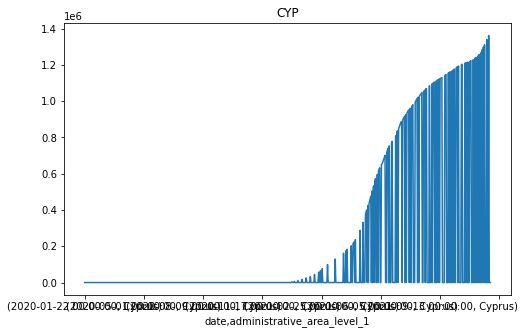

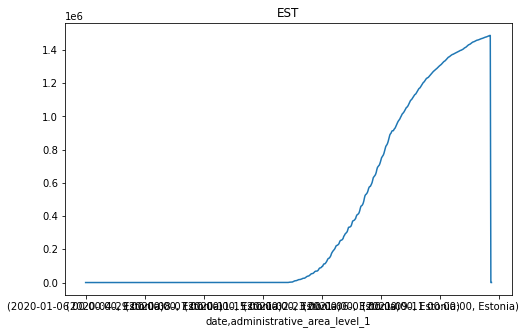

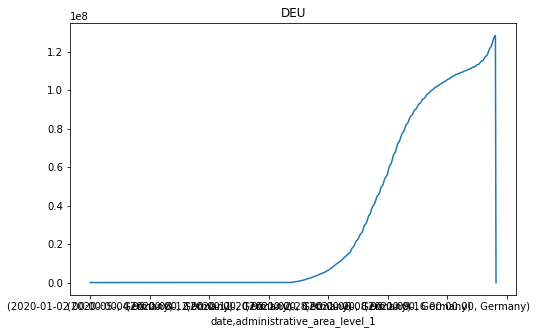

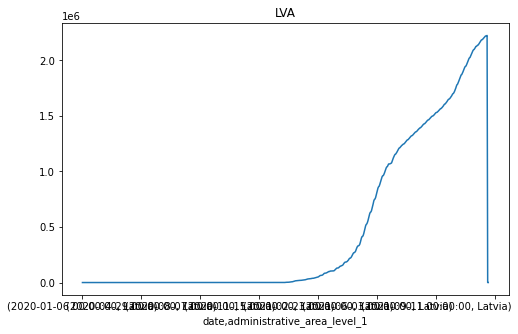

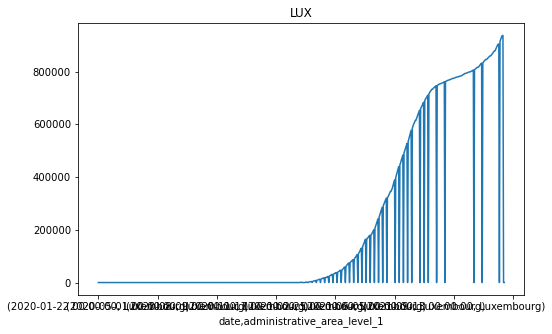

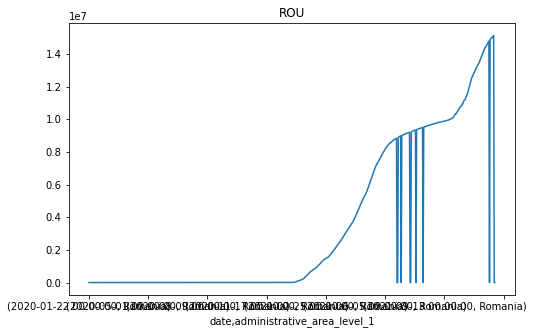

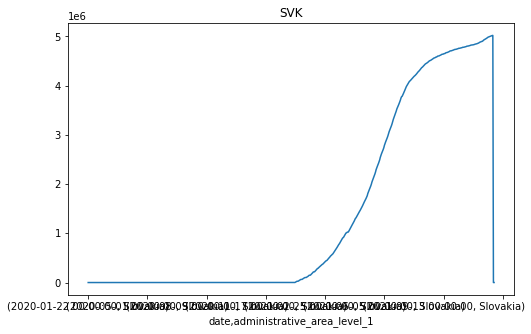

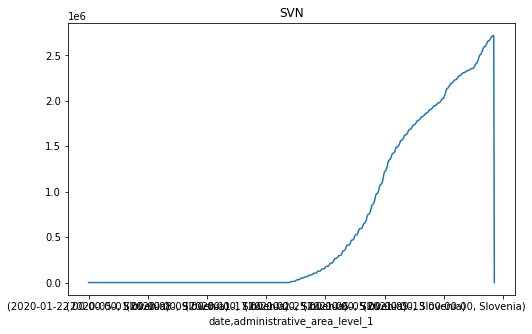

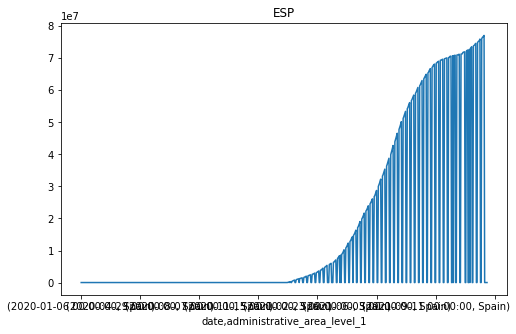

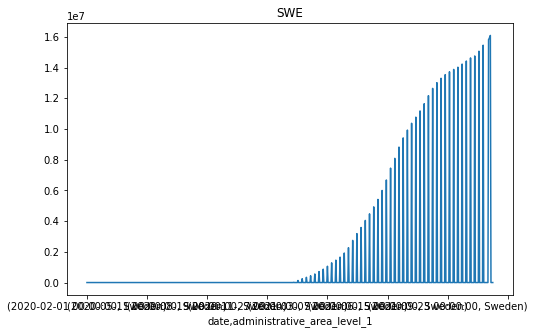

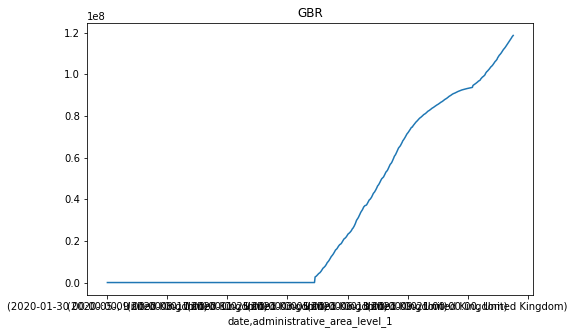

In [45]:
for i in eu_codes[eu_codes[3].isin(src.iso_alpha_3.unique())][3]:
    x.query(f'iso_alpha_3 == "{i}"').groupby(
    ['date', 'administrative_area_level_1'])['vaccines'].sum().plot(
    x = 'date', y = 'vaccines', 
    legend = False, figsize = (8,5)) 
    plt.title(f'{i}')
    plt.show()

In [46]:
for i in eu_codes[eu_codes[3].isin(src.iso_alpha_3.unique())][3]:
    print(i, '\n')
    print(x.query(f'iso_alpha_3 == "{i}"')[['date', 'vaccines']] \
    .dropna(subset = ['vaccines']))

AUT 

           date    vaccines
5007 2020-12-27       763.0
5008 2020-12-28      2096.0
5009 2020-12-29      3770.0
5010 2020-12-30      5167.0
5011 2020-12-31      5185.0
...         ...         ...
5347 2021-12-02  14208294.0
5348 2021-12-03  14351797.0
5349 2021-12-04  14438401.0
5350 2021-12-05  14478194.0
5351 2021-12-06  14555660.0

[345 rows x 2 columns]
BEL 

            date    vaccines
17519 2020-12-28       338.0
17520 2020-12-29       374.0
17521 2020-12-30       892.0
17522 2020-12-31       931.0
17523 2021-01-01       944.0
...          ...         ...
17858 2021-12-02  19109646.0
17859 2021-12-03  19215288.0
17860 2021-12-04  19263380.0
17861 2021-12-05  19266721.0
17862 2021-12-06  19312274.0

[344 rows x 2 columns]
BGR 

            date   vaccines
59375 2020-12-29     1719.0
59376 2020-12-30     4608.0
59378 2021-01-01     4739.0
59382 2021-01-05     5448.0
59383 2021-01-06     7913.0
...          ...        ...
59713 2021-12-02  3370825.0
59714 2021-12-03  3390634.

## 2. Google mobility data 

Notes from google team to keep in mind while interepresting the data. 

**"Location accuracy and the understanding of categorized places varies from region to region, so we don’t recommend using this data to compare changes between countries, or between regions with different characteristics (e.g. rural versus urban areas)."**

[Google mobility data](https://www.google.com/covid19/mobility/) are downloaded on **22-12-2021**. 

In [6]:
gog = dd.read_csv('01_Raw Data/Google Mobility Data/*.csv', dtype={'grocery_and_pharmacy_percent_change_from_baseline': 'float64',
       'iso_3166_2_code': 'object', 'sub_region_2': 'object',
       'parks_percent_change_from_baseline': 'float64',
       'residential_percent_change_from_baseline': 'float64',
       'retail_and_recreation_percent_change_from_baseline': 'float64',
       'sub_region_1': 'object',
       'transit_stations_percent_change_from_baseline': 'float64',
       'workplaces_percent_change_from_baseline': 'float64','metro_area': 'object'})
gog_eu = gog[gog['country_region_code'].isin(eu_codes.iso2.unique())].compute()
gog_eu.rename(columns={'sub_region_1': 'state',
                        'sub_region_2': 'county',
                        'country_region_code' : 'iso2', 
                         'country_region': 'country',
                        'retail_and_recreation_percent_change_from_baseline': 'retail',
                        'grocery_and_pharmacy_percent_change_from_baseline': 'grocery',
                        'parks_percent_change_from_baseline': 'parks',
                        'transit_stations_percent_change_from_baseline': 'transit',
                        'workplaces_percent_change_from_baseline': 'workplaces',
                        'residential_percent_change_from_baseline': 'residential'}, inplace = True)
gog_eu.drop(['iso_3166_2_code', 'iso_3166_2_code', 'census_fips_code', 'place_id', 'metro_area'], axis = 1, inplace = True)
gog_eu['date'] = pd.to_datetime(gog_eu['date'])
gog_eu.dropna(subset=['country', 'state'], inplace = True) # not by county, some NUTS2 levels don't have countries i.g. Vienna (Austria) 

# gog_eu = gog_eu.groupby(['iso2', 'country', 'state', 'date']).mean().reset_index().drop('iso2', axis =1)
# gog_eu.rename({"state": "region"}, axis =1, inplace = True)
gog_eu.head(3)

iso2  country       state county       date  retail  grocery  parks  \
321   AT  Austria  Burgenland    NaN 2020-02-15    -3.0     -3.0   57.0   
322   AT  Austria  Burgenland    NaN 2020-02-16    15.0      NaN   47.0   
323   AT  Austria  Burgenland    NaN 2020-02-17     9.0      6.0   24.0   

     transit  workplaces  residential  
321     21.0        -7.0         -2.0  
322     11.0        -2.0         -1.0  
323     12.0         3.0         -2.0

In [9]:
len(gog_eu.query('country == "Latvia"').state.unique())

58

In [94]:
# Export the id columns to be filled by the nuts_id 
# gog_eu.iloc[:,:2].drop_duplicates(subset = ['region']).to_excel('01_Raw Data/gog_index.xlsx', index = False)

## 3. Appel mobility data 



[Appel Mobility Data](https://covid19.apple.com/mobility) are downloaded on **22-12-2021**.

In [95]:
apl = pd.read_csv('01_Raw Data/Appel Mobility Data/applemobilitytrends-2021-12-20.csv', sep = ',', low_memory = False)
apl.drop('alternative_name', axis = 1, inplace = True)
apl = apl[apl['country'].notna()]
apl = apl.query('geo_type != "city"').drop(['sub-region', 'geo_type'], axis =1)
apl_eu = apl[apl['country'].isin(eu_codes.country.unique())]
apl_eu = apl_eu.melt(id_vars = ['region', 'country', 'transportation_type'], var_name = "date")
apl_eu = apl_eu.pivot(index = ['region', 'country', 'date'], columns = 'transportation_type', values = 'value').reset_index()
apl_eu['date'] = pd.to_datetime(apl_eu['date'])
apl_eu.head(3)

transportation_type          region country       date  driving  transit  \
0                    Abruzzo Region   Italy 2020-01-13   100.00      NaN   
1                    Abruzzo Region   Italy 2020-01-14    96.57      NaN   
2                    Abruzzo Region   Italy 2020-01-15    97.50      NaN   

transportation_type  walking  
0                     100.00  
1                     107.12  
2                     109.09

In [110]:
# Export the id columns to be filled by the nuts_id 
# aplid = apl_eu.iloc[:,:2].drop_duplicates(subset = ['region']).sort_values(by = "country")
# aplid = aplid[['country', 'region']]
# aplid.to_excel('01_Raw Data/apl_index.xlsx', index = False)

In [13]:
# fr = apl_eu.query('country == "Austria"', engine = 'python').melt(id_vars = ['region', 'country', 'date'])

# with plt.style.context('dark_background'):
#     fig = plt.figure(figsize = (9,6))
#     sns.lineplot(x = 'date', y = 'value', style = 'region', hue = 'region', data= fr, palette = 'tab20c')
# plt.legend(bbox_to_anchor = (1, .8), frameon = False)
# plt.title('Apple mobility data for France', loc = 'left')
# plt.show()

## 4. harmonizing Appel & Google data 

In [ ]:
## Read the ids for both dfs 
# google's 

# Apple's 